In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

In [71]:
# GCL from exercise 1

mod = 2**32 
multiplier = 1013904223
increment = 1664525
seed = int((97771 + 95637 + 99288 + 95605) / 4)

numsGen = {}
numsGen[0] = seed

def GCL(n):
    if (n in numsGen) :
        return numsGen[n]
    else:
        numsGen[n] = (multiplier*GCL(n-1) + increment) % mod
        return numsGen[n]

# Ejercicio 2

Proponer, y realizar, al menos 2 tests sobre el generador congruencial lineal implementado en el Ejercicio 1. Evaluar e interpretar los resultados de cada uno

## Gap Test

In [98]:
# Generamos y contamos las observaciones del GCL del ejercicio 1b
# Luego calculamos la probabilidades de la geómetrica usada para el Gap Test
# Utilizaremos un intervalo de [0,3 ; 0,6]

random_probabilities = list()
for i in range(0,100000):
    x = GCL(i+1)
    random_probabilities.insert(i,x/mod)
experimental_results = np.zeros(len(random_probabilities))

# Counting gap occurrencies
gap_length = 0
for i in range(len(random_probabilities)):
    if(random_probabilities[i] >= 0.3 and random_probabilities[i] <= 0.6):
        experimental_results[gap_length] = experimental_results[gap_length] + 1
        gap_length = 0
    else:
        gap_length = gap_length + 1

number_of_experiments = sum(experimental_results)
# We take gaps with length up to 100, although the max gap is near 50
experimental_results = experimental_results[:100]

probabilities = np.zeros(len(experimental_results))
# Prob to be in the interval
probabilities[0] = 0.6 - 0.3
for i in range(1,len(experimental_results)):
    probabilities[i] = ((1 - probabilities[0]) ** i) * probabilities[0]

In [99]:
from scipy import stats as stats

# Ahora aplicamos la chi cuadrado
# “Degrees of freedom”: adjustment to the degrees of freedom for the p-value. The p-value is computed using a chi-squared distribution with k - 1 - ddof degrees of freedom, where k is the number of observed frequencies.
degrees_of_freedom = 0.1

obs = experimental_results
expected_values = probabilities * number_of_experiments
(s,p) = stats.chisquare(obs, f_exp = expected_values, ddof = degrees_of_freedom)
print("s = " + str(s))
print("p = " + str(p))

if(1-p < degrees_of_freedom):
    print("Acepto H0")
else:    
    print("Rechazo H0")

s = 42.671359139997406
p = 0.9999998602576667
Acepto H0


El resultado es que la hipótesis se acepta.

## Test Espectral de 2 Dimensiones

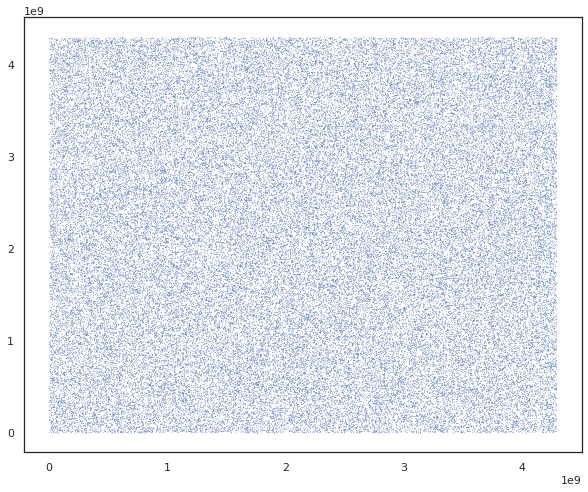

In [83]:
sample_length = 100000
values = list()

for i in range(0,sample_length):
    x = GCL(i+1)
    values.insert(i,x)

x_values = []
y_values = []
for i in range(1, sample_length):
    x_values.append(values[i])
    y_values.append(values[i-1])

plt.scatter(x_values, y_values, s = 0.02)
plt.show()

La imagen se ve bastante difusa, con lo cual esto es lo que nos interesa para un GCL, como vimos en clase. A continuación voy a hacer zoom en los ejes X e Y para ver si podemos encontrar algún patrón.

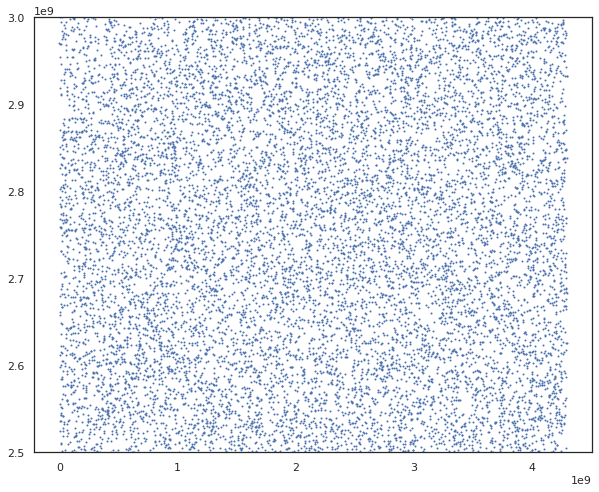

In [84]:
figzoom, axzoom = plt.subplots()

axzoom.scatter(x_values, y_values, s=1)

axzoom.set_ylim(2500000000, 3000000000)

plt.show()

Hacemos zoom ahora al eje X

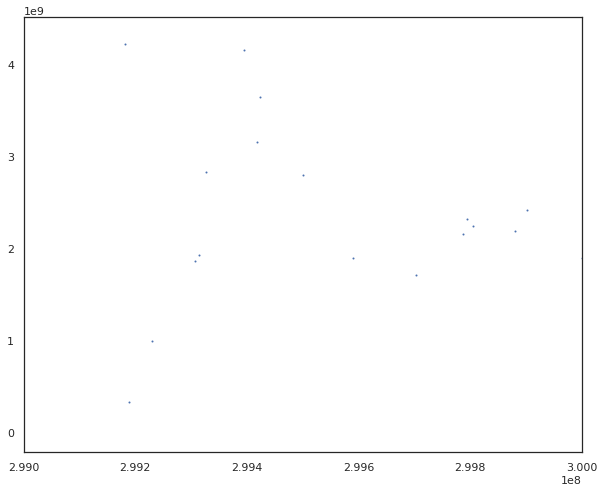

In [100]:
figzoom, axzoom = plt.subplots()

axzoom.scatter(x_values, y_values, s=1)

axzoom.set_xlim(29900000000, 3000000000)

plt.show()

En conclusión, no encontramos ningún patrón en nuestro test, y la imagen más macro se ve super difusa, por lo que no se observa ningún patrón que indique alguna deficiencia en el GNL.